## Importing packages and data

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np
import yellowbrick
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [255]:
df = pd.read_csv(r"C:\Users\noahw\OneDrive\Desktop\machinelearning\insurance.csv")

## Information about the data

In [256]:
df.shape

(1338, 7)

In [257]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [259]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [260]:
pd.DataFrame(df.groupby("region")["age","charges","bmi","children"].mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Greens")

<ipython-input-260-2b1315e0330e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.DataFrame(df.groupby("region")["age","charges","bmi","children"].mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Greens")


,age,charges,bmi,children
region,,,,
southwest,39.455385,12346.937377,30.596615,1.141538
northeast,39.268519,13406.384516,29.173503,1.046296
northwest,39.196923,12417.575374,29.199785,1.147692
southeast,38.939560,14735.411438,33.355989,1.049451


In [261]:
pd.DataFrame(df.groupby("sex")["age","charges","bmi","children"].mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Greens")

<ipython-input-261-a2e2464afedf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.DataFrame(df.groupby("sex")["age","charges","bmi","children"].mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Greens")


,age,charges,bmi,children
sex,,,,
female,39.503021,12569.578844,30.377749,1.074018
male,38.917160,13956.751178,30.943129,1.115385


In [262]:
pd.DataFrame(df.groupby("children")["age","charges","bmi"].mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Greens")

<ipython-input-262-4d3c42fd7e15>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.DataFrame(df.groupby("children")["age","charges","bmi"].mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Greens")


,age,charges,bmi
children,,,
3,41.566879,15355.318367,30.684331
1,39.453704,12731.171832,30.623148
2,39.445833,15073.563734,30.978104
4,39.000000,13850.656311,31.391200
0,38.444251,12365.975602,30.550296
5,35.611111,8786.035247,29.605000


In [263]:
pd.DataFrame(df.groupby("smoker")["age","charges","bmi","children"].mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Greens")

<ipython-input-263-522051e3c882>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.DataFrame(df.groupby("smoker")["age","charges","bmi","children"].mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Greens")


,age,charges,bmi,children
smoker,,,,
no,39.385338,8434.268298,30.651795,1.090226
yes,38.514599,32050.231832,30.708449,1.113139


## Data Visualisation 

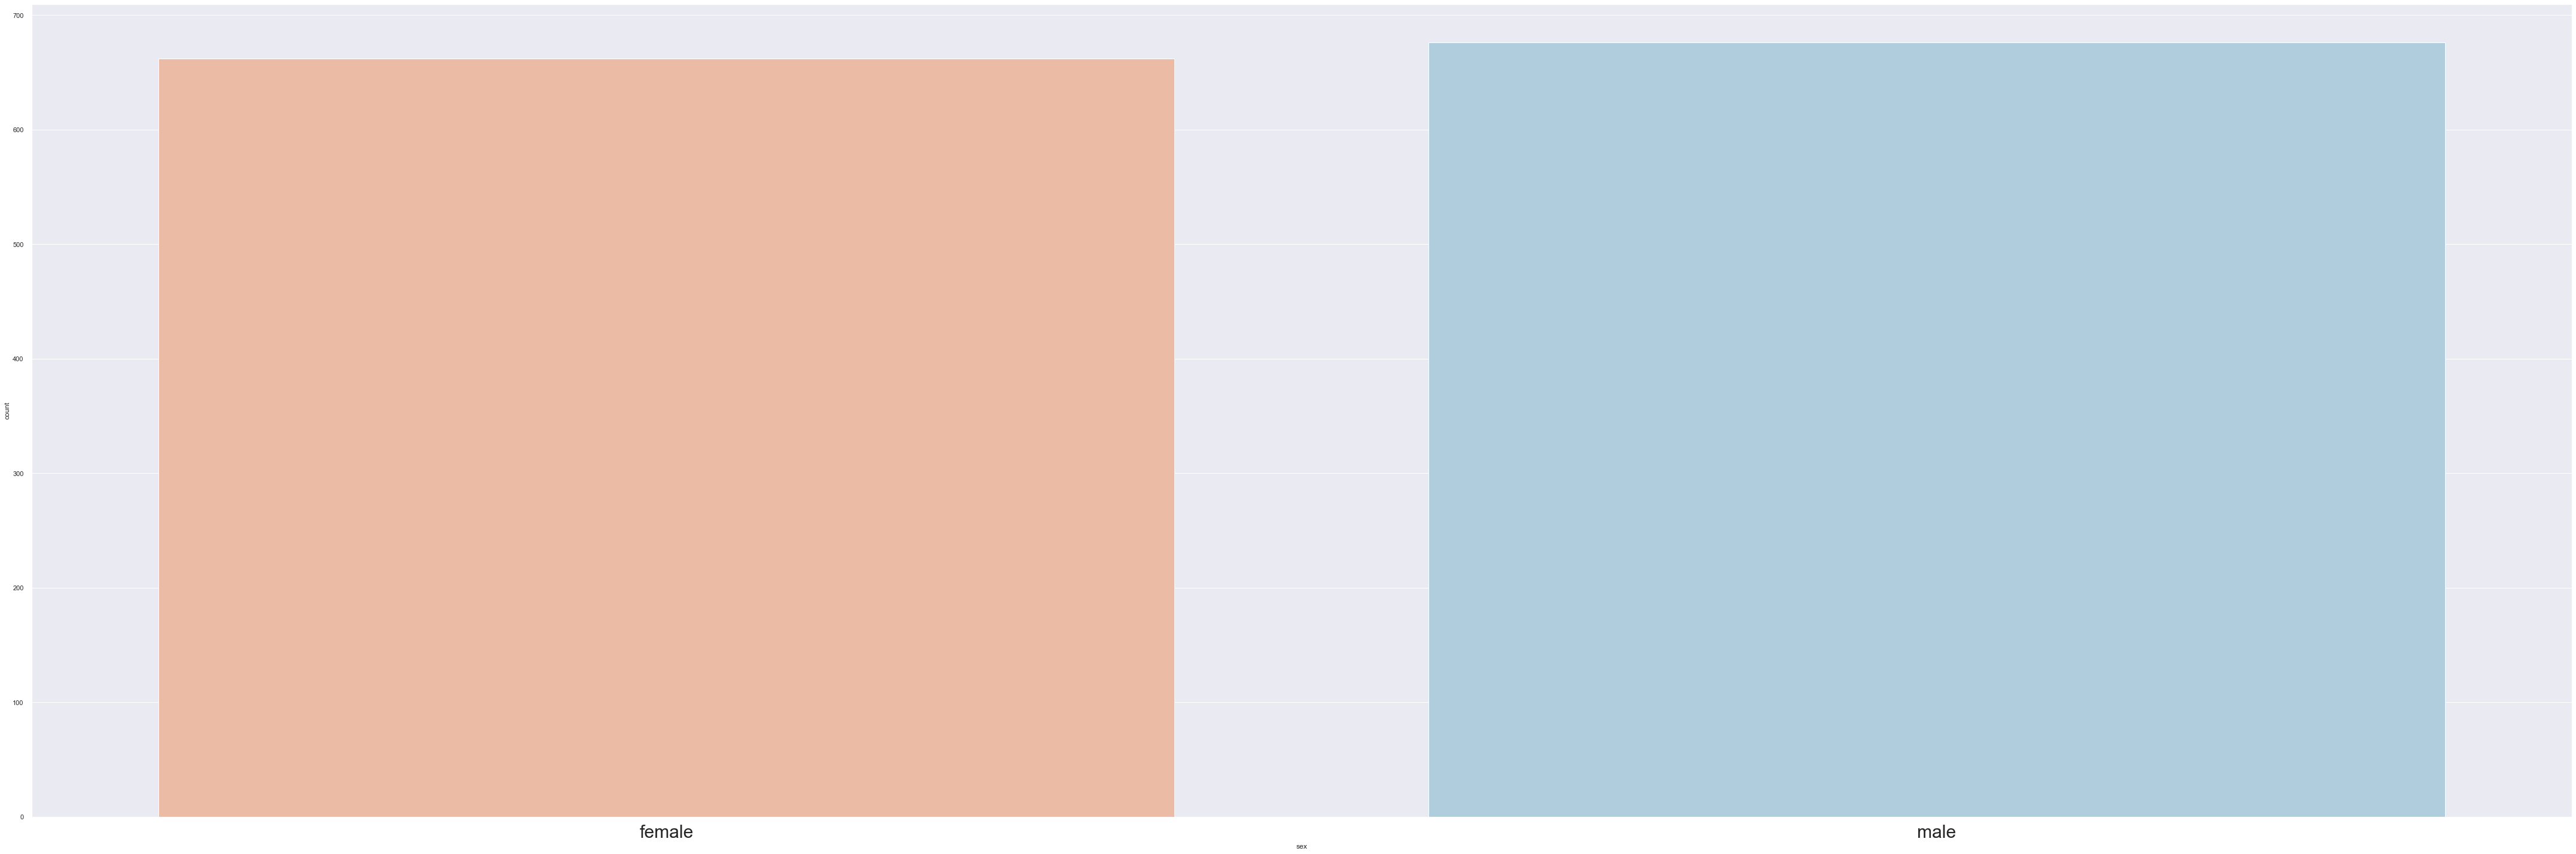

In [264]:
plt.figure(figsize = (60,20))
sns.set(style="darkgrid")
ax = sns.countplot(x='sex',data=df, palette='RdBu')
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 30)
plt.tight_layout()


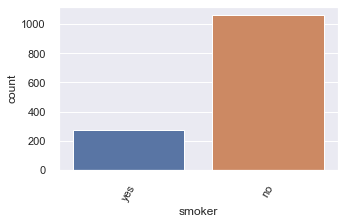

In [265]:
plt.figure(figsize=(5,3))
sns.countplot(x="smoker", data = df)
plt.xticks(rotation = 60)
plt.show()

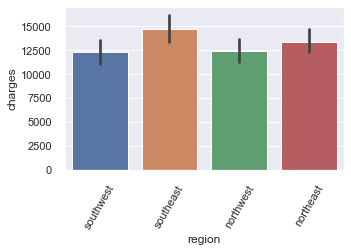

In [266]:
plt.figure(figsize=(5,3))
sns.barplot(x="region", y="charges", data = df)
plt.xticks(rotation = 60)
plt.show()

In [267]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [268]:
df.sex = df.sex.replace(['male','female'],[1,0])
df.smoker = df.smoker.replace(['yes','no'],[1,0])

<AxesSubplot:>

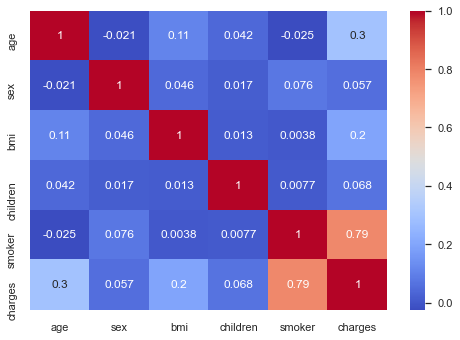

In [269]:
corr=df.corr()
sns.heatmap(corr,vmax=1,annot=True,cmap="coolwarm")

<ipython-input-270-62870b3d53ca>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


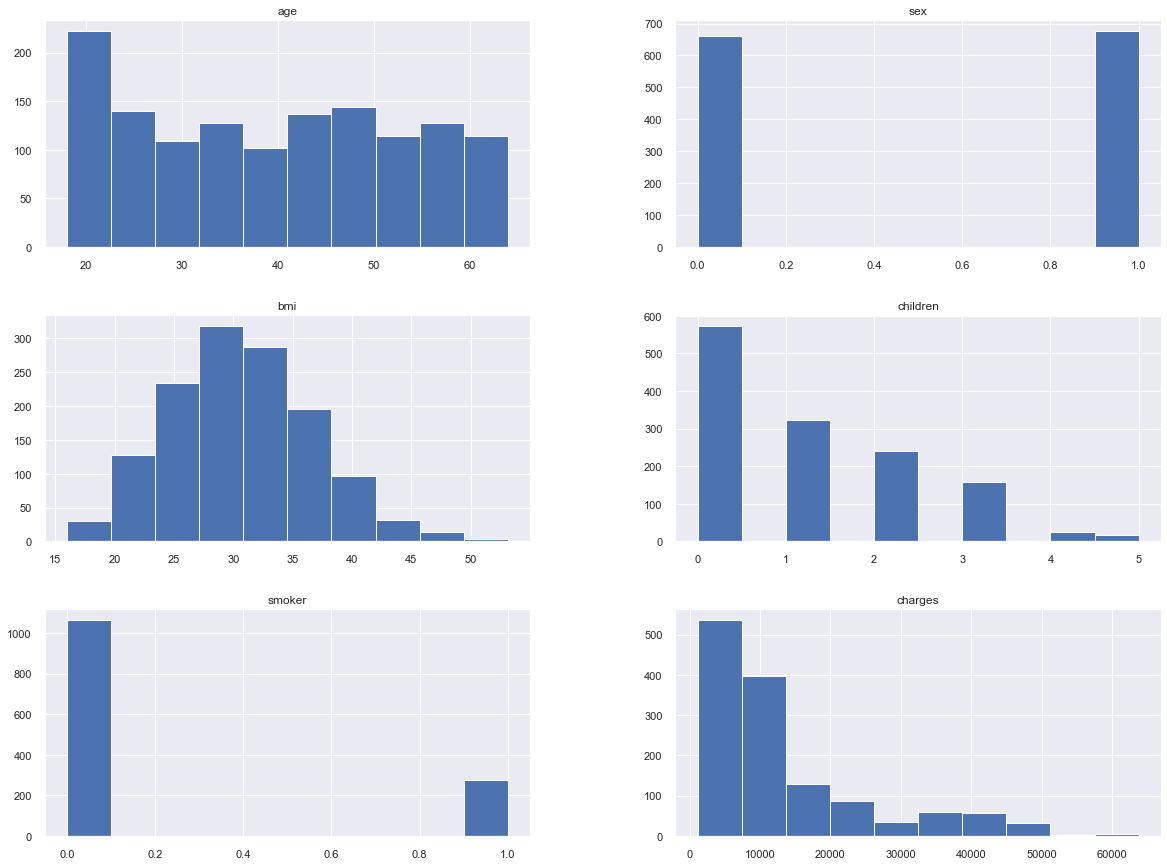

In [270]:

fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

## Preprocessing 

C:\Users\noahw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


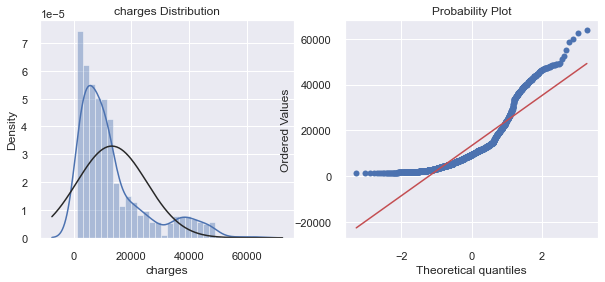

In [271]:
from scipy.stats import norm
from scipy import stats

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["charges"], fit=norm)
plt.title("charges Distribution")
plt.subplot(1,2,2)
stats.probplot(df["charges"], plot = plt)
plt.show()

In [272]:
df["charges"] = np.log1p(df["charges"])

C:\Users\noahw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


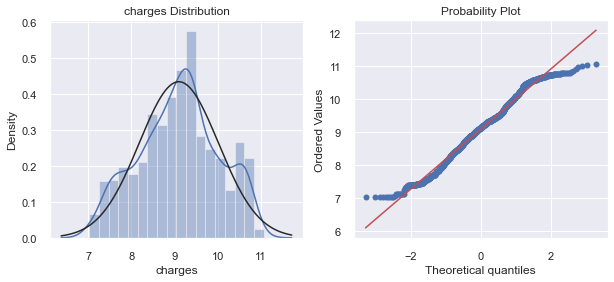

In [273]:
from scipy.stats import norm
from scipy import stats

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["charges"], fit=norm)
plt.title("charges Distribution")
plt.subplot(1,2,2)
stats.probplot(df["charges"], plot = plt)
plt.show()

In [274]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,9.734236
1,18,1,33.770,1,0,southeast,7.453882
2,28,1,33.000,3,0,southeast,8.400763
3,33,1,22.705,0,0,northwest,9.998137
4,32,1,28.880,0,0,northwest,8.260455


## Modeling

### Regression Tree

In [275]:

# definition of leaf nodes and decision nodes : feature index, threshold, left, right and variance reduction variables are only for
# decision nodes. value variable is for leaf nodes. 

class Node():
    def __init__(self, feature_index=None, threshold_value=None, left_child=None, right_child=None, variance_reduction=None, value=None):
        self.feature_index=feature_index
        self.threshold_value=threshold_value
        self.left_child=left_child
        self.right_child=right_child
        self.variance_reduction=variance_reduction
        self.value=value

In [276]:
class RegressionTree():
    def __init__(self,min_samples_in_split=2,max_tree_depth=2):  # for the stopping criteria to avoid overfitting problem
        self.root=None 
        self.min_samples_in_split=min_samples_in_split
        self.max_tree_depth=max_tree_depth
        
        
        
    def variance_reduction(self,parent_node,left_child,right_child):
        weight_left_child=len(left_child)/len(parent_node) # is used for scaling
        weight_right_child=len(right_child)/len(parent_node)
        variance_reduction=np.var(parent_node) - (weight_left_child*np.var(left_child) + weight_right_child*np.var(right_child))  
        return variance_reduction
            
    
#define the tree building method
 
    def build_tree(self,dataset,current_depth=0):
        X,Y = dataset[:,:-1], dataset[:,-1]  #seperate the variables from the target variable
        num_samples,num_features=np.shape(X)
        best_split_pool={}
        if num_samples>=self.min_samples_in_split and current_depth<=self.max_tree_depth:
            best_split_pool=self.find_best_split(dataset,num_samples,num_features)
            if best_split_pool["variance_reduction"]>0: 
                left_subtree=self.build_tree(best_split_pool["left_data"],current_depth+1)
                right_subtree=self.build_tree(best_split_pool["right_data"],current_depth+1)
                
                #create the decision node
                return Node(best_split_pool["feature_index"],best_split_pool["threshold_value"], left_subtree,right_subtree,best_split_pool["variance_reduction"])

        
        leaf_value=self.leaf_node_value(Y) #  we use the calculate_leaf_value function to calculate leaf node value
        return Node(value=leaf_value)   
    
    def split(self, dataset,feature_index, threshold_value):
        left_data= np.array([row for row in dataset if row[feature_index]<=threshold_value])
        right_data= np.array([row for row in dataset if row[feature_index]>threshold_value])
        return left_data, right_data
    
    
    def find_best_split(self,dataset,num_samples,num_features):
        best_split_pool={} 
        max_variance_reduction=-float("inf")
        
        for feature_index in range(num_features): #loop through all features and all possible threshold values for that feature
            feature_values=dataset[:,feature_index]
            possible_thresholds=np.unique(feature_values)  
            
            for threshold_value in possible_thresholds:
                left_data, right_data=self.split(dataset, feature_index,threshold_value)
                if len(left_data)>0 and len(right_data)>0: 
                    Y,left_Y,right_Y=dataset[:,-1], left_data[:,-1],right_data[:,-1] 
                    curr_variance_reduction=self.variance_reduction(Y,left_Y,right_Y)  #to calculate the IG or reduction in impurity, use variance reduction
                    
                    if curr_variance_reduction>max_variance_reduction: # if this IG is greater than the max IG then update best split 
                        best_split_pool["feature_index"]=feature_index
                        best_split_pool["threshold_value"]=threshold_value
                        best_split_pool["left_data"]=left_data
                        best_split_pool["right_data"]=right_data
                        best_split_pool["variance_reduction"]=curr_variance_reduction
                        max_variance_reduction=curr_variance_reduction
                    
        return best_split_pool
    
    
    def leaf_node_value(self,Y):
        leaf_val=np.mean(Y)
        return leaf_val
    

    #to print the decision tree     
    
    def print_tree(self, tree=None, indent=" "):
        if not tree:
            tree=self.root
            
        
        if tree.value is not None:
            print(tree.value)
            
        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold_value, "?", tree.variance_reduction)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left_child, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right_child, indent +  indent)
            
    
    def fit(self, X,Y):
        
        dataset=np.concatenate((X,Y), axis=1)
        self.root= self.build_tree(dataset)  #build the tree to train the model
        
    
    def make_prediction(self,x,tree): # take a single data point and find the corresponding y value
        # start with root node, if it meets the conditions, then it goes to left child else moves to the right node. repeat 
        # till you reach to the leaf node
        
        if tree.value!=None: 
            return tree.value
        feature_val=x[tree.feature_index]
        if feature_val<= tree.threshold_value:
            return self.make_prediction(x,tree.left_child)
        else:
            return self.make_prediction(x,tree.right_child)
        
        
        
    def predict(self,X):
        predictions=[self.make_prediction(x,self.root) for x in X]
        return predictions  #an array of target valuess

In [277]:

df = df.drop(['region'],axis=1)
# Training and test split

X=df.iloc[:,:-1].values
Y= df.iloc[:,-1].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.20, random_state=41)


X_train.shape
X_test.shape

(268, 5)

In [278]:
# now fit the model

regressor= RegressionTree(min_samples_in_split=3,max_tree_depth=3)
regressor.fit(X_train,Y_train)
regressor.print_tree()

X_4 <= 0.0 ? 0.39536310185783663
 left:X_0 <= 32.0 ? 0.2724638255166991
  left:X_0 <= 22.0 ? 0.08842685281604723
    left:X_3 <= 1.0 ? 0.07360201840329311
        left:7.670508806314007
        right:8.50366930549674
    right:X_3 <= 0.0 ? 0.04603989347654197
        left:8.110961298224673
        right:8.547109708773528
  right:X_0 <= 46.0 ? 0.06918938219983459
    left:X_0 <= 42.0 ? 0.016357307408069593
        left:8.799968797305931
        right:9.082896926750461
    right:X_0 <= 51.0 ? 0.016073351169119426
        left:9.221974503468873
        right:9.49609898566572
 right:X_2 <= 30.0 ? 0.12003980284062135
  left:X_0 <= 40.0 ? 0.020499877453310195
    left:X_2 <= 22.895 ? 0.004401488316124379
        left:9.72003952252185
        right:9.859618809061244
    right:X_2 <= 25.85 ? 0.01007006155353738
        left:9.995560024639294
        right:10.196467073219088
  right:X_0 <= 41.0 ? 0.008116093627620925
    left:X_0 <= 27.0 ? 0.0031453720436654536
        left:10.495267225741035
 

In [279]:
# Test the model by calculating MSE, RMSE,R^2
Y_pred=regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,Y_pred))
print(np.sqrt(mean_squared_error(Y_test,Y_pred)))
print(r2_score(Y_test, Y_pred))
print(mean_absolute_error(Y_test, Y_pred))

0.1506934377988294
0.38819252671687204
0.8058824873386409
0.23209563699469216


In [280]:

reg_tree_results = pd.DataFrame(data=[["Regression Tree",mean_absolute_error(Y_test, Y_pred),mean_squared_error(Y_test,Y_pred),np.sqrt(mean_squared_error(Y_test,Y_pred)),r2_score(Y_test, Y_pred)]], 
                          columns=["Reg. Model", 'MAE', 'MSE', 'RMSE', 'R^2'])
reg_tree_results

,Reg. Model,MAE,MSE,RMSE,R^2
0,Regression Tree,0.232096,0.150693,0.388193,0.805882


### scikit-learn Decision Tree Regression

In [281]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(random_state = 0)
regr.fit(X_train, Y_train)

test_set_predictions = regr.predict(X_test)
train_set_predictions = regr.predict(X_train)


print("Performance metrics for test set:\n")
print_evaluate(Y_test, test_set_predictions)

print("\n")

print("Performance metrics for training set:\n")
print_evaluate(Y_train, train_set_predictions)



Performance metrics for test set:

Mean absolute error is: 0.23899037780995833
Mean squared error is: 0.24688849231998658
Root mean squared error is: 0.496878750119168
R-Square is: 0.6819677038767434


Performance metrics for training set:

Mean absolute error is: 0.002121840402237128
Mean squared error is: 0.0024086805805227118
Root mean squared error is: 0.049078310693449013
R-Square is: 0.9972034913239788


In [282]:
dec_tree_results = pd.DataFrame(data=[["DecisionTreeRegressor", *evaluate(Y_test, test_set_predictions) , cross_val(DecisionTreeRegressor())]], 
                          columns=['Reg. Model', 'MAE', 'MSE', 'RMSE', 'R^2', "CV"])
dec_tree_results

,Reg. Model,MAE,MSE,RMSE,R^2,CV
0,DecisionTreeRegressor,0.23899,0.246888,0.496879,0.681968,0.660324


### Linear Regression

In [283]:

# k=10 fold cross validation is used for models
from sklearn import metrics
from sklearn.model_selection import cross_val_score


def cross_val(model):
    pred = cross_val_score(model, X, Y, cv=10)
    return pred.mean()

def evaluate(actual, predicted):
    mae = metrics.mean_absolute_error(actual, predicted)
    mse = metrics.mean_squared_error(actual, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(actual, predicted))
    r_square = metrics.r2_score(actual, predicted)
    return mae, mse, rmse, r_square

def print_evaluate(actual, predicted):  
    mae = metrics.mean_absolute_error(actual, predicted)
    mse = metrics.mean_squared_error(actual, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(actual, predicted))
    r_square = metrics.r2_score(actual, predicted)
    print('Mean absolute error is:', mae)
    print('Mean squared error is:', mse)
    print('Root mean squared error is:', rmse)
    print('R-Square is:', r_square)

In [284]:

# Training and test split
X = df.drop('charges', axis =1)
#X=df.iloc[:,:-1].values

Y= df['charges']
#Y= df.iloc[:,-1].values.reshape(-1,1)

X_train, X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.20, random_state=41)

In [285]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 


In [286]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() 
lm.fit(X_train,Y_train)

LinearRegression()

In [287]:
print(lm.coef_)
print(lm.intercept_)

[ 0.48212056 -0.02915202  0.06664161  0.11746868  0.64270273]
9.108029633979754


In [288]:

# Making the predictions
predictions = lm.predict(X_test)

In [289]:
test_predictions = lm.predict(X_test)
train_predictions = lm.predict(X_train)

print("Performance metrics for test set:\n")
print_evaluate(Y_test, test_predictions)

print("\n")

print("Performance metrics for training set:\n")
print_evaluate(Y_train, train_predictions)

Performance metrics for test set:

Mean absolute error is: 0.2811662069050891
Mean squared error is: 0.20656420720123597
Root mean squared error is: 0.45449335220796794
R-Square is: 0.7339119029171088


Performance metrics for training set:

Mean absolute error is: 0.2800226140406663
Mean squared error is: 0.19795984426614752
Root mean squared error is: 0.44492678528736335
R-Square is: 0.7701661123228037


In [290]:
lm_results = pd.DataFrame(data=[["Linear Regression", *evaluate(Y_test, test_predictions) , cross_val(LinearRegression())]], 
                          columns=['Reg. Model', 'MAE', 'MSE', 'RMSE', 'R^2', "CV"])
lm_results

,Reg. Model,MAE,MSE,RMSE,R^2,CV
0,Linear Regression,0.281166,0.206564,0.454493,0.733912,0.758268


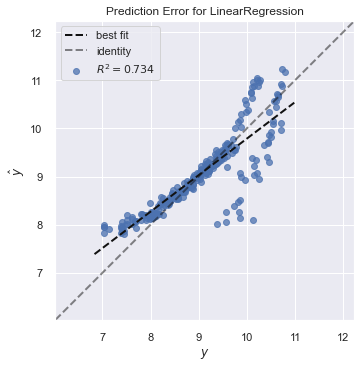

In [291]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(lm)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)        
visualizer.show();

In [292]:
df_linearRegression = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
df_linearRegression.head()

,Actual,Predicted
1083,8.313239,8.501874
1237,9.411267,9.324649
519,8.258101,8.362872
79,8.790577,8.789087
930,7.982097,8.457398


### Random Forrest

In [293]:
from sklearn.ensemble import RandomForestRegressor




In [294]:

random_forest = RandomForestRegressor(n_estimators=500)
random_forest.fit(X_train, Y_train)

test_predictions = random_forest.predict(X_test)
train_predictions = random_forest.predict(X_train)



print("Performance metrics for test set:\n")
print_evaluate(Y_test, test_predictions)

print("\n")
print("Performance metrics for training set:\n")
print_evaluate(Y_train, train_predictions)



random_forest_results = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(Y_test, test_predictions), cross_val(RandomForestRegressor())]], 
                            columns=['Reg. Model', 'MAE', 'MSE', 'RMSE', 'R^2', 'CV'])


random_forest_results

Performance metrics for test set:

Mean absolute error is: 0.21583675303760688
Mean squared error is: 0.15754143156084463
Root mean squared error is: 0.3969148920875162
R-Square is: 0.7970611641594757


Performance metrics for training set:

Mean absolute error is: 0.08150709694634797
Mean squared error is: 0.025147142791000814
Root mean squared error is: 0.15857850671197787
R-Square is: 0.9708038485630509


,Reg. Model,MAE,MSE,RMSE,R^2,CV
0,Random Forest Regressor,0.215837,0.157541,0.396915,0.797061,0.789475


In [295]:
# Performance metrics together

perf_metrics = reg_tree_results.append(lm_results, ignore_index=True)
perf_metrics = perf_metrics.append(random_forest_results, ignore_index=True)
perf_metrics = perf_metrics.append(dec_tree_results, ignore_index=True)
perf_metrics



,Reg. Model,MAE,MSE,RMSE,R^2,CV
0,Regression Tree,0.232096,0.150693,0.388193,0.805882,NaN
1,Linear Regression,0.281166,0.206564,0.454493,0.733912,0.758268
2,Random Forest Regressor,0.215837,0.157541,0.396915,0.797061,0.789475
3,DecisionTreeRegressor,0.238990,0.246888,0.496879,0.681968,0.660324
